# Birthdays in USA

In [43]:
from urllib import request
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [44]:
request.urlretrieve ("https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv")

('C:\\Users\\HP\\AppData\\Local\\Temp\\tmpgptxwq14',
 <http.client.HTTPMessage at 0x1edeef97580>)

In [46]:
births = "births.csv"

In [47]:
from urllib import request

url = "https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv"
local_filename = "births.csv"

# Download the file from the URL and save it locally with the specified filename
request.urlretrieve(url, local_filename)


('births.csv', <http.client.HTTPMessage at 0x1edef032a00>)

In [48]:
births = pd.read_csv('births.csv')

In [49]:
births.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [73]:
births.head(10)

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4
1969-01-03,1969,1,3,M,4994,1960,4
1969-01-04,1969,1,4,F,4440,1960,5
1969-01-04,1969,1,4,M,4520,1960,5
1969-01-05,1969,1,5,F,4192,1960,6
1969-01-05,1969,1,5,M,4198,1960,6


In [51]:
births['decade'] = 10 * (births['year'] // 10)

In [52]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


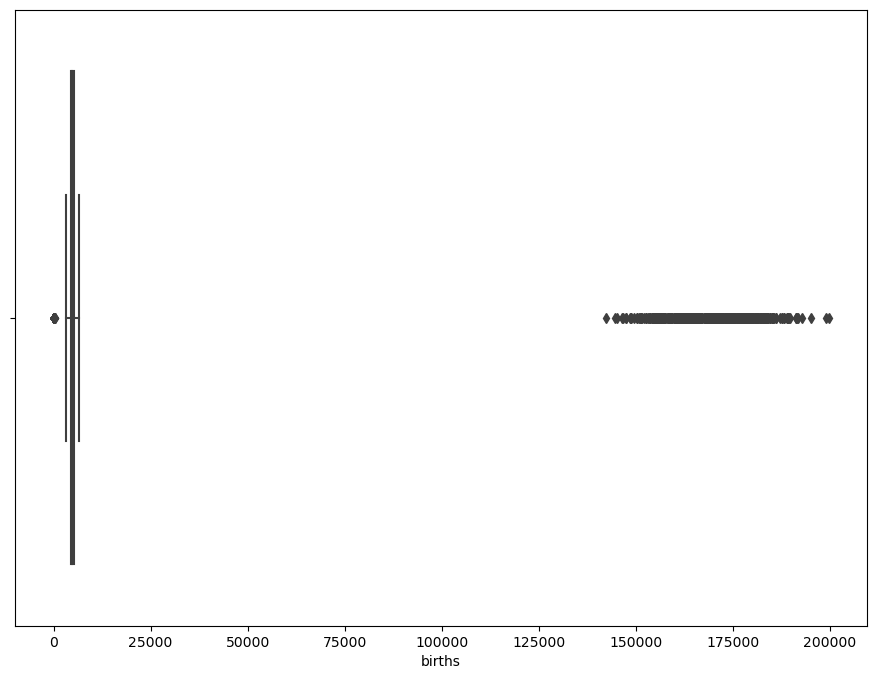

In [53]:
fig = plt.figure(figsize=(11,8))
fig = sns.boxplot(births.births)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


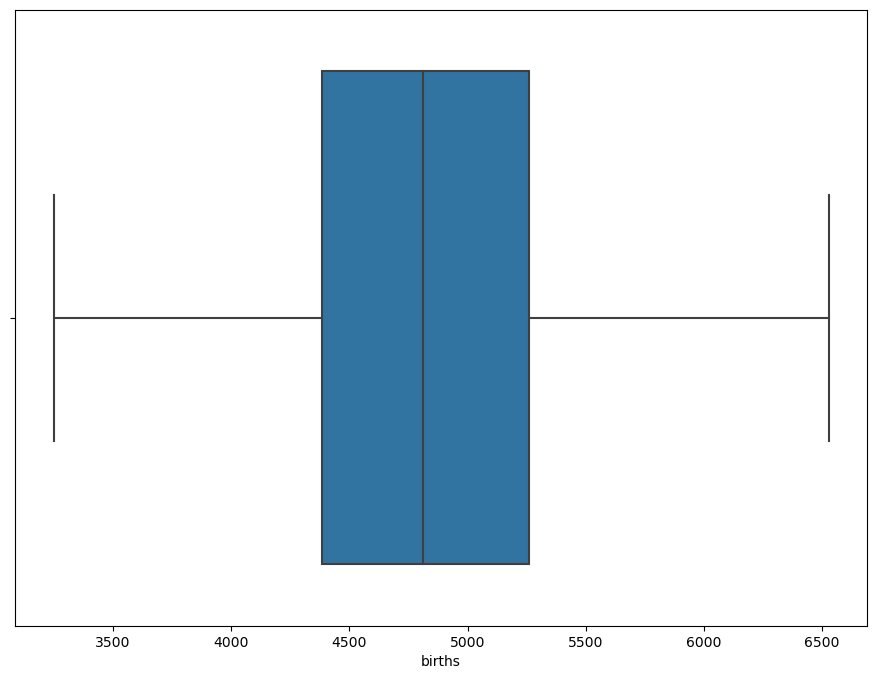

In [57]:
births = births.query('(births > 1000) & (births < 190000)')
fig = plt.figure(figsize=(11,8))
fig = sns.boxplot(births.births)

In [58]:
births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14610 entries, 0 to 15066
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    14610 non-null  int64  
 1   month   14610 non-null  int64  
 2   day     14610 non-null  float64
 3   gender  14610 non-null  object 
 4   births  14610 non-null  int64  
 5   decade  14610 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 799.0+ KB


In [62]:
births['day'] = births['day'].astype(int)

In [63]:
births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14610 entries, 0 to 15066
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    14610 non-null  int64 
 1   month   14610 non-null  int64 
 2   day     14610 non-null  int32 
 3   gender  14610 non-null  object
 4   births  14610 non-null  int64 
 5   decade  14610 non-null  int64 
dtypes: int32(1), int64(4), object(1)
memory usage: 741.9+ KB


In [65]:
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

In [69]:
births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


C:\Users\HP\AppData\Local\Temp\ipykernel_1108\775091489.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


<Figure size 1100x800 with 0 Axes>

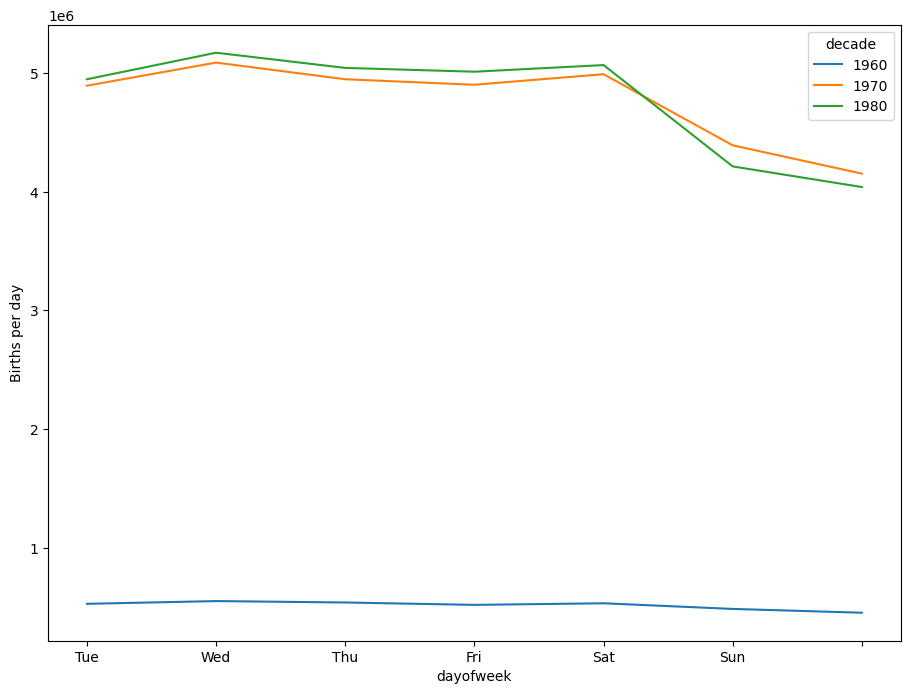

In [70]:
fig = plt.figure(figsize=(11,8))
births_per_day = births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='sum')
births_per_day.plot(figsize=(11,8))
plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('Births per day');

In [72]:
births_per_day.head(10)

decade,1960,1970,1980
dayofweek,,,
0,526638,4895418,4949739
1,549754,5090433,5173612
2,537910,4949892,5045584
3,517742,4903588,5013476
4,531220,4992508,5069502
5,483710,4392927,4214867
6,451604,4154367,4041017


In [77]:
births_per_month = births.pivot_table('births', index='month', columns='decade', aggfunc='sum')

In [81]:
births_per_month.head(12)

decade,1960,1970,1980
month,,,
1,293876,2762078,2703211
2,270534,2554666,2537385
3,296436,2786246,2785458
4,282470,2608881,2669424
5,289018,2714618,2781584
6,291448,2696116,2771007
7,318288,2927375,2974632
8,320922,2987439,3001403
9,312444,2935125,2958403


C:\Users\HP\AppData\Local\Temp\ipykernel_1108\3415051528.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(months_lable)


<Figure size 1100x800 with 0 Axes>

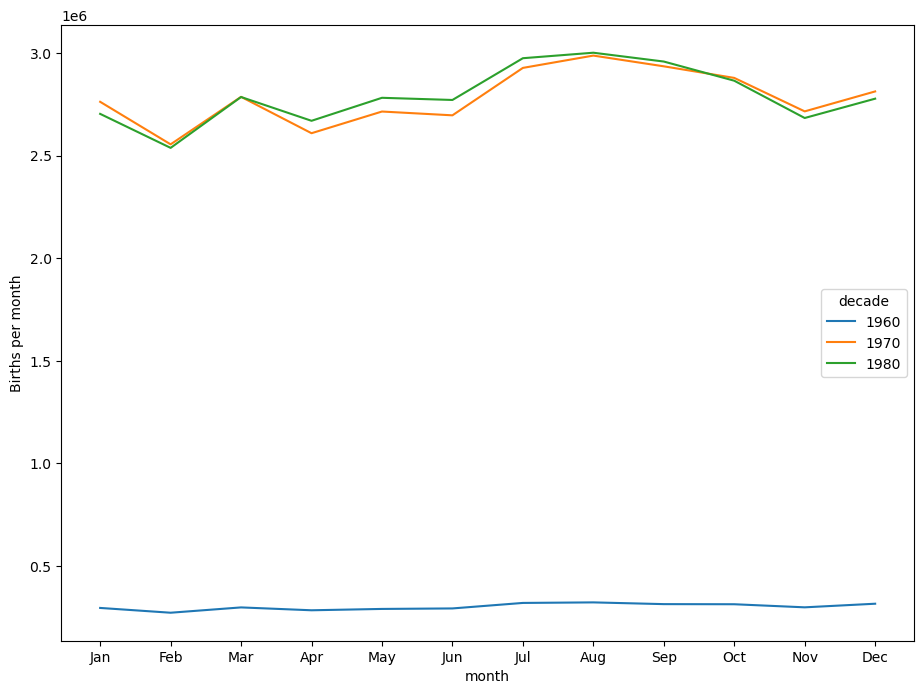

In [93]:
fig = plt.figure(figsize=(11,8))
births_per_month = births.pivot_table('births', index='month', columns='decade', aggfunc='sum')
births_per_month.plot(figsize=(11,8))
months_lable = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.gca().set_xticklabels(months_lable)
plt.xticks(range(1, 13), months_lable)
plt.ylabel('Births per month');

In [94]:
import os
os.getcwd()

'C:\\Users\\HP'